In [1]:
import math as m
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def mastercard(x,y):
    circ_der = (x-0.7)**2 + y**2
    circ_izq = (x+0.7)**2 + y**2
    if circ_der <= 1 or circ_izq <=1:
        respuesta = True
    else:
        respuesta = False
    return respuesta

def elipse(x,y):
    la_elise = x**2/6.0 + y**2/4.0
    if la_elise >= 1:
        respuesta = True
    else: 
        respuesta = False
    return respuesta
    
def Malla_electrodos(x,y,elec_in,elec_out):
    Nx , Ny = len(x) , len(y)
    malla = np.zeros((Nx,Ny))
    for i in range(Nx):
        for j in range(Ny):
            if  elec_in(x[i],y[j]):
                malla[i,j] = 1
            elif elec_out(x[i],y[j]):
                malla[i,j] = 0
            else:
                malla[i,j] = rd.random()
    return malla

def chk_ind(x,y,V):
    pts = []
    for i in range(len(x)):
        for j in range(len(y)):
            if 0 < V[i,j] < 1:
                pts.append([i,j])
    return pts

def Relajar_v2(V,inds):
    for ind in inds:
        V[ind[0],ind[1]] = 0.25*( V[ind[0]+1,ind[1]] + V[ind[0]-1,ind[1]] + V[ind[0],ind[1]+1] + V[ind[0],ind[1]-1] )
    return V

def Met_Jocobi_v2(V,inds,err=1e-4):
    diferencia = 1
    while diferencia > err:
        for i in range(20):
            V = Relajar_v2(V,inds)
        V_ref = Relajar_v2(np.copy(V),inds)
        diferencia = np.max(abs(V_ref-V))
    return V

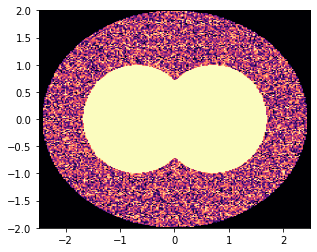

In [3]:
x , y = np.linspace(-2.5,2.5,200) , np.linspace(-2,2,200)
pot = Malla_electrodos(x,y,mastercard,elipse)
plt.imshow(pot.transpose(),
           extent=(x[0],x[-1],y[0],y[-1]),
           origin='lower',
           cmap='magma')
plt.show()

In [4]:
indices_mc = chk_ind(x,y,pot)
len(indices_mc)

19180

In [7]:
%%time
pot = Met_Jocobi_v2(pot,indices_mc)

CPU times: user 5.34 s, sys: 19.8 ms, total: 5.36 s
Wall time: 5.36 s


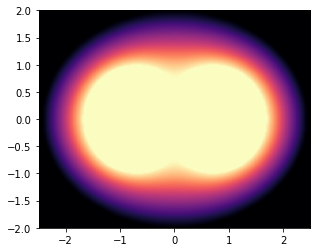

In [8]:
plt.imshow(pot.transpose(),
           extent=(x[0],x[-1],y[0],y[-1]),
           origin='lower',
           cmap='magma')
plt.show()

In [9]:
Ex,Ey = np.gradient(-pot.transpose())

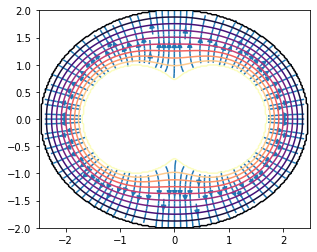

In [10]:
niveles = np.linspace(0,0.999,10)
plt.streamplot(x,y,Ey,Ex,density=1.5)
plt.contour(x,y,pot.transpose(),
            levels=niveles,
            origin='lower',
            cmap='magma')
plt.gca().set_aspect('equal')
plt.show()

## Midiendo la convergencia

In [12]:
def Conver_Jocobi(V,inds,cifras=4):
    iteracion , diferencia = 0 , 1
    conver = []
    err = 1/(10**cifras)
    while diferencia > err:
        V = Relajar_v2(V,inds)
        V_ref = Relajar_v2(np.copy(V),inds)
        diferencia = np.max(abs(V_ref-V))
        conver.append(diferencia)
    return V,conver

In [22]:
x , y = np.linspace(-2.5,2.5,200) , np.linspace(-2,2,200)
pot = Malla_electrodos(x,y,mastercard,elipse)
indices_mc = chk_ind(x,y,pot)
pot,convergencia = Conver_Jocobi(pot,indices_mc,cifras=5)

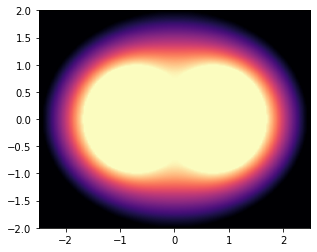

In [23]:
plt.imshow(pot.transpose(),
           extent=(x[0],x[-1],y[0],y[-1]),
           origin='lower',
           cmap='magma')
plt.show()

Iteraciones= 1325


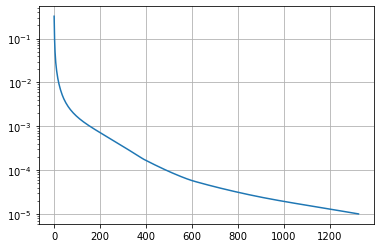

In [27]:
print('Iteraciones=',len(convergencia))
plt.semilogy(convergencia)
plt.grid()
plt.show()

In [28]:
x , y = np.linspace(-2.5,2.5,100) , np.linspace(-2,2,100)
pot = Malla_electrodos(x,y,mastercard,elipse)
indices_mc = chk_ind(x,y,pot)
pot,convergencia = Conver_Jocobi(pot,indices_mc,cifras=5)

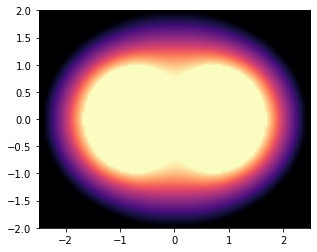

In [29]:
plt.imshow(pot.transpose(),
           extent=(x[0],x[-1],y[0],y[-1]),
           origin='lower',
           cmap='magma')
plt.show()

Iteraciones= 528


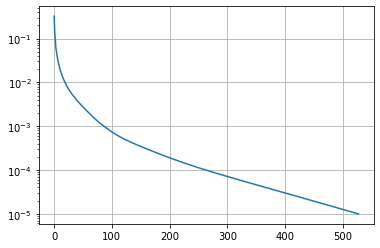

In [30]:
print('Iteraciones=',len(convergencia))
plt.semilogy(convergencia)
plt.grid()
plt.show()